<a href="https://colab.research.google.com/github/2BerbyMarty2/Machine_Learning_CW/blob/main/Gender_Recognition_by_Voice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
path = kagglehub.dataset_download("primaryobjects/voicegender")

100%|██████████| 405k/405k [00:00<00:00, 59.3MB/s]

Extracting files...


In [34]:
path = "/content/voice.csv"

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [49]:
df = pd.read_csv(path)

In [50]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [51]:
df.isna().sum()

,0
meanfreq,0
sd,0
median,0
Q25,0
Q75,0
IQR,0
skew,0
kurt,0
sp.ent,0
sfm,0


In [52]:
df.dtypes

,0
meanfreq,float64
sd,float64
median,float64
Q25,float64
Q75,float64
IQR,float64
skew,float64
kurt,float64
sp.ent,float64
sfm,float64


In [53]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [54]:
X = df.drop('label', axis=1)
y = df['label']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
clf = DecisionTreeClassifier(
    max_depth=5,          # Control tree depth to prevent overfitting
    min_samples_split=20, # Minimum samples to split a node
    min_samples_leaf=10,  # Minimum samples in a leaf
    random_state=42
)

In [59]:
# Train
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.962

Classification Report:
              precision    recall  f1-score   support

      female       0.94      0.98      0.96       297
        male       0.98      0.95      0.96       337

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



Top 10 Most Important Features:
    feature  importance
12  meanfun    0.903434
5       IQR    0.049085
13   minfun    0.020961
8    sp.ent    0.011968
9       sfm    0.008510
17   maxdom    0.004813
6      skew    0.000469
10     mode    0.000376
3       Q25    0.000220
19  modindx    0.000165


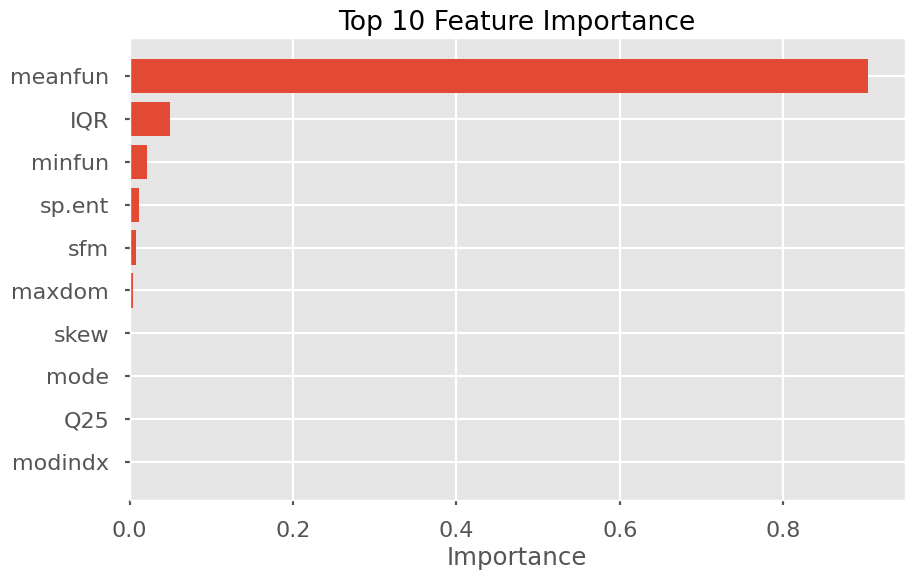

In [60]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [61]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for optimization
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")

# Use best model
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, y_pred_best):.3f}")

Best parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best cross-validation score: 0.972
Test accuracy: 0.964


In [62]:
# Extract and display the most important decision rules
from sklearn.tree import export_text

tree_rules = export_text(
    best_clf,
    feature_names=list(X.columns),
    max_depth=3  # Show only top 3 levels
)
print("Top Decision Rules:")
print(tree_rules)

Top Decision Rules:
|--- meanfun <= 0.14
|   |--- IQR <= 0.07
|   |   |--- meanfun <= 0.13
|   |   |   |--- sfm <= 0.44
|   |   |   |   |--- class: male
|   |   |   |--- sfm >  0.44
|   |   |   |   |--- class: female
|   |   |--- meanfun >  0.13
|   |   |   |--- mode <= 0.19
|   |   |   |   |--- class: female
|   |   |   |--- mode >  0.19
|   |   |   |   |--- class: female
|   |--- IQR >  0.07
|   |   |--- meanfun <= 0.13
|   |   |   |--- minfun <= 0.02
|   |   |   |   |--- class: male
|   |   |   |--- minfun >  0.02
|   |   |   |   |--- truncated branch of depth 4
|   |   |--- meanfun >  0.13
|   |   |   |--- minfun <= 0.04
|   |   |   |   |--- class: female
|   |   |   |--- minfun >  0.04
|   |   |   |   |--- truncated branch of depth 2
|--- meanfun >  0.14
|   |--- meanfun <= 0.15
|   |   |--- IQR <= 0.10
|   |   |   |--- IQR <= 0.07
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- IQR >  0.07
|   |   |   |   |--- class: female
|   |   |--- IQR >  0.10
|   |   |   |

In [63]:
# If your labels are imbalanced
from sklearn.utils import class_weight

# Calculate class weights
weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(zip(np.unique(y_train), weights))

# Train with class weights
clf_balanced = DecisionTreeClassifier(
    max_depth=5,
    class_weight=class_weights,  # Add class weights
    random_state=42
)
clf_balanced.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={'female': np.float64(0.9844599844599845),
                                     'male': np.float64(1.016038492381716)},
                       max_depth=5, random_state=42)